## INTRODUCTION

The purpose of this project is to predict the chances of cancellation of rooms.The dataset is taken from kaggle https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/download?datasetVersionNumber=1 .

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#lets import the model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# model evaluation
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import f1_score,recall_score,precision_score,plot_roc_curve
from sklearn.preprocessing import LabelEncoder

In [2]:
%matplotlib inline

In [3]:
df=pd.read_csv("dataset.csv")

In [4]:
%config InlineBackend.figure_format = 'retina'

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [6]:
# converting this date time column to its correct type otherwise
# it shall be counted in categorical feature and that would not be good for the project
df['reservation_status_date']=df['reservation_status_date'].astype('datetime64')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8840\2291708387.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['reservation_status_date']=df['reservation_status_date'].astype('datetime64')


In [7]:
#  let's seperate the categorical and numerical features so that we can visualise them properly
categoricals=[i for i in df.columns if df.dtypes[i]=='object']
numericals=[i for i in df.columns if df.dtypes[i]!='object']

In [8]:
categoricals

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [9]:
numericals

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'company',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date']

In [10]:
unwanted_room = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'Wanted', 'Unwanted')

In [11]:
df['unwanted_room'] = unwanted_room

In [12]:
df.drop('unwanted_room', axis = 1, inplace = True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-03-07


#  
Let's do some exploratory data analysis

In [13]:
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-03-07
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-03-07
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-03-07
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-03-07
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-06-05
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [14]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [15]:
df['is_canceled'].mean()

0.37041628277075134

<AxesSubplot: xlabel='is_canceled', ylabel='count'>

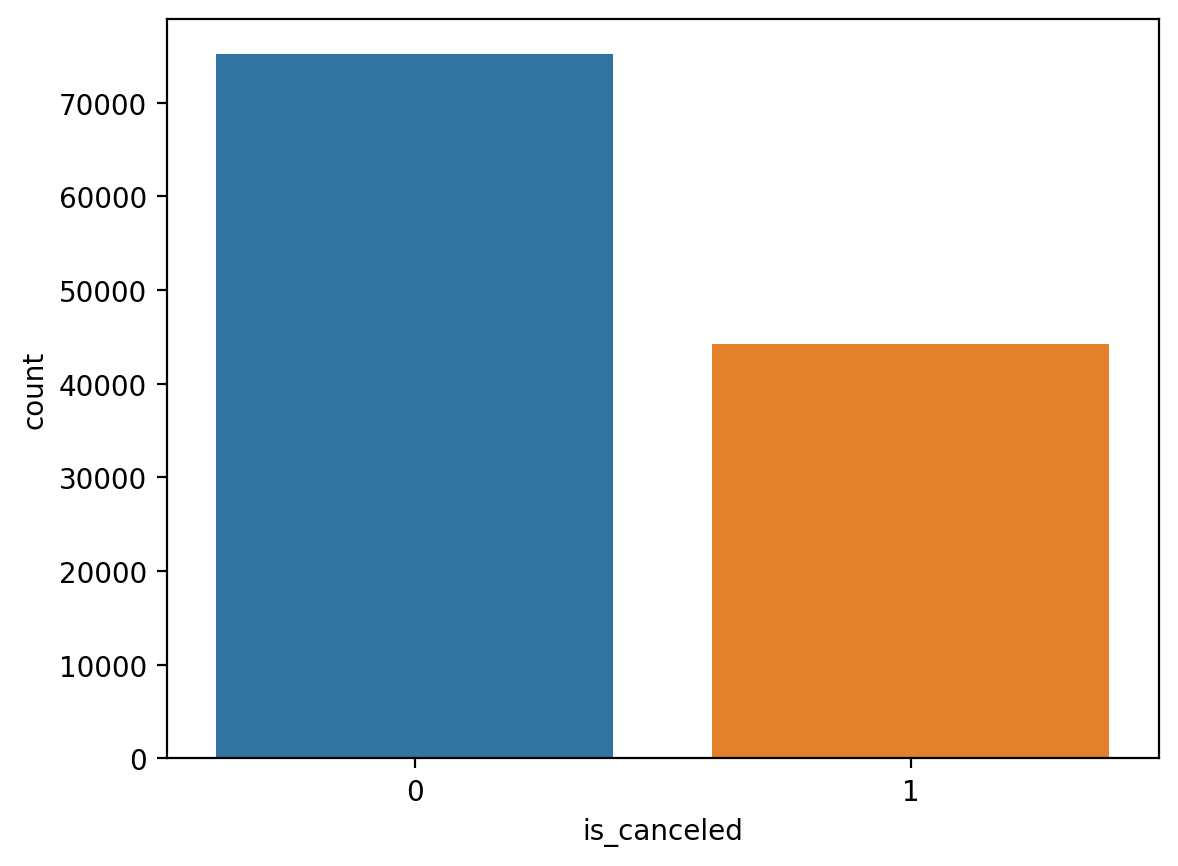

In [16]:
sns.countplot(x="is_canceled",data=df)

In [17]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

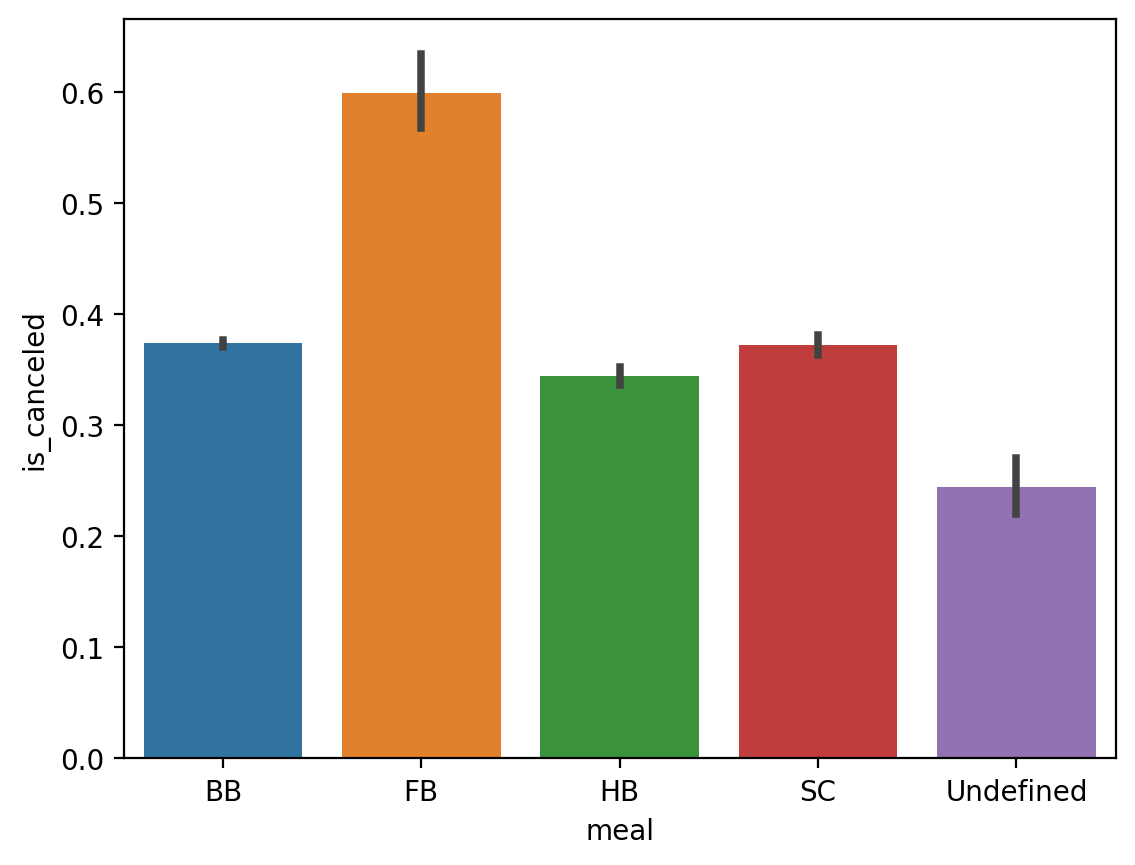

In [18]:
# let's check that how the cancellation rate vary with respect to the meal
ax=sns.barplot(x='meal',y='is_canceled',data=df,estimator='mean')

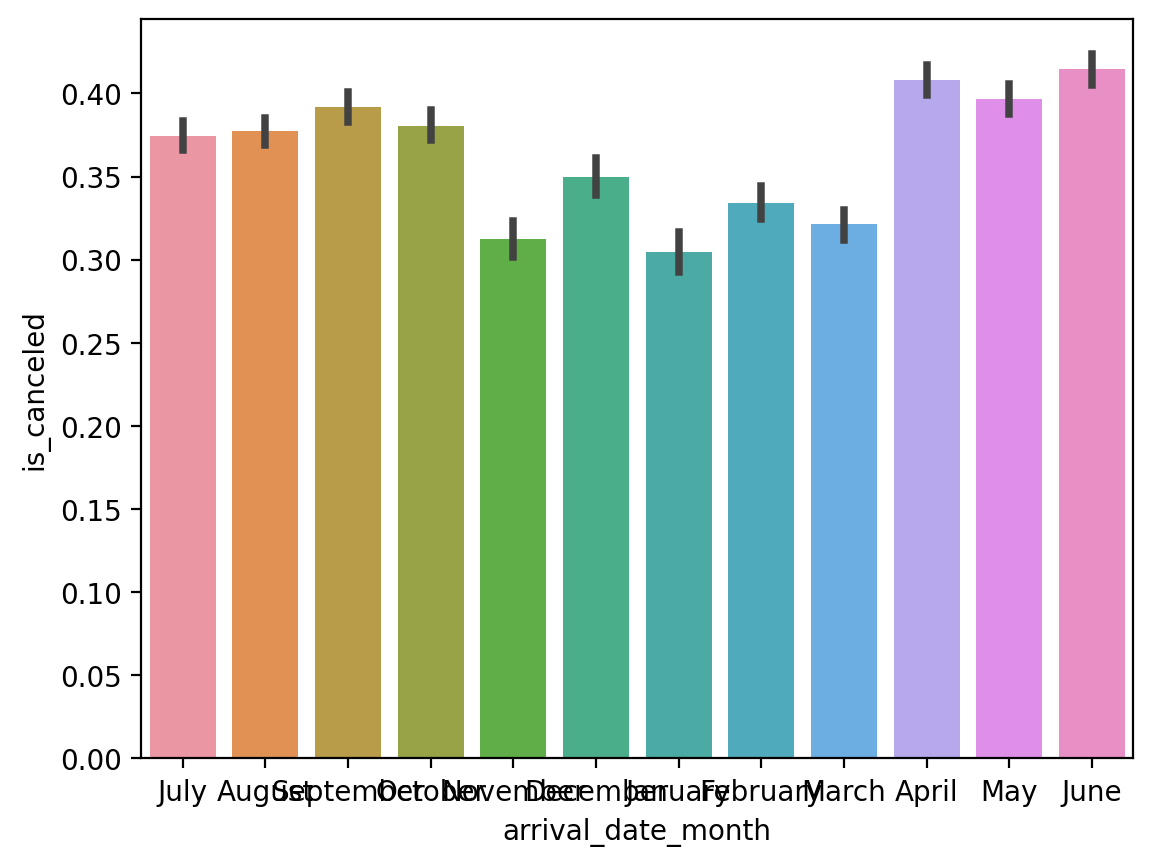

In [19]:
#  checking that how the cancellation rate vary with the arrival_date_month
ax=sns.barplot(x='arrival_date_month',y='is_canceled',data=df,estimator='mean')

# 
so here we can see that there is not much discrimination with respect to the month

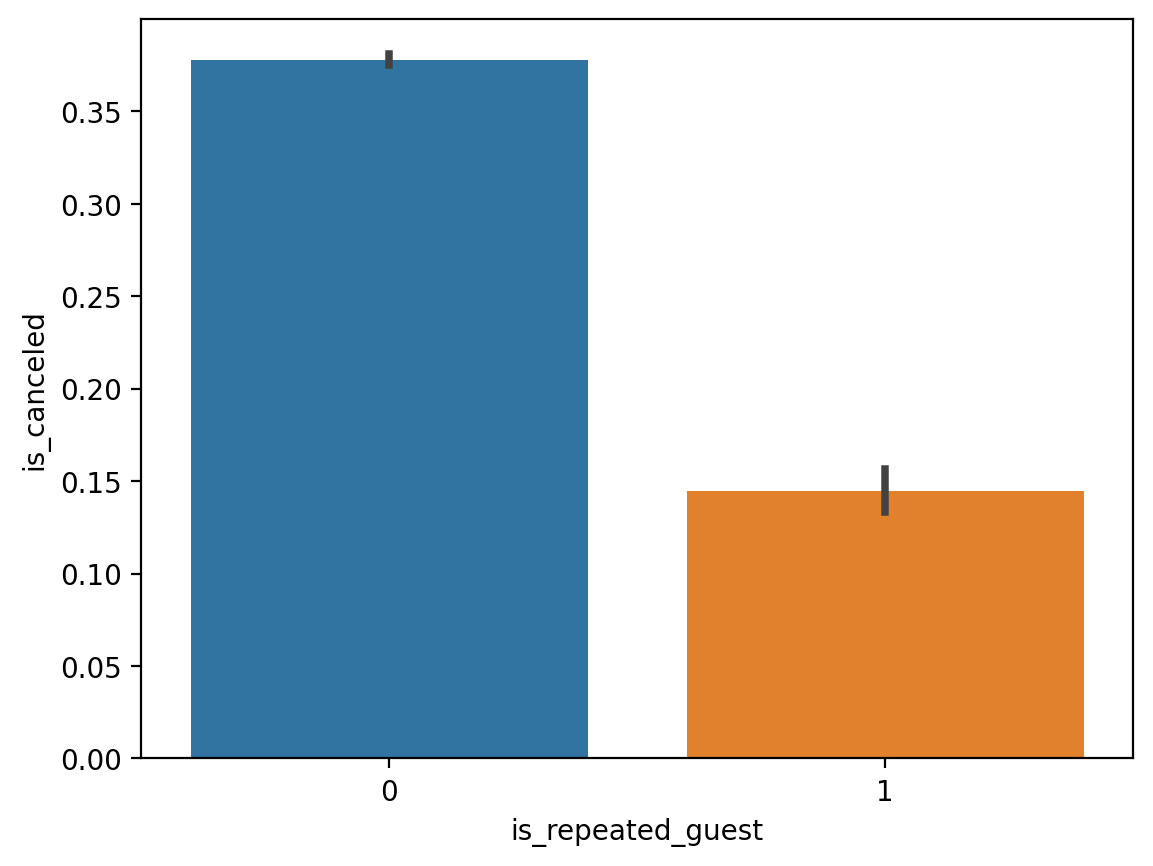

In [20]:
ax=sns.barplot(x='is_repeated_guest',y='is_canceled',estimator='mean',data=df)

# 
so we can see that if the guest is repeated the chances of cancellation is quite less and that is expected also.

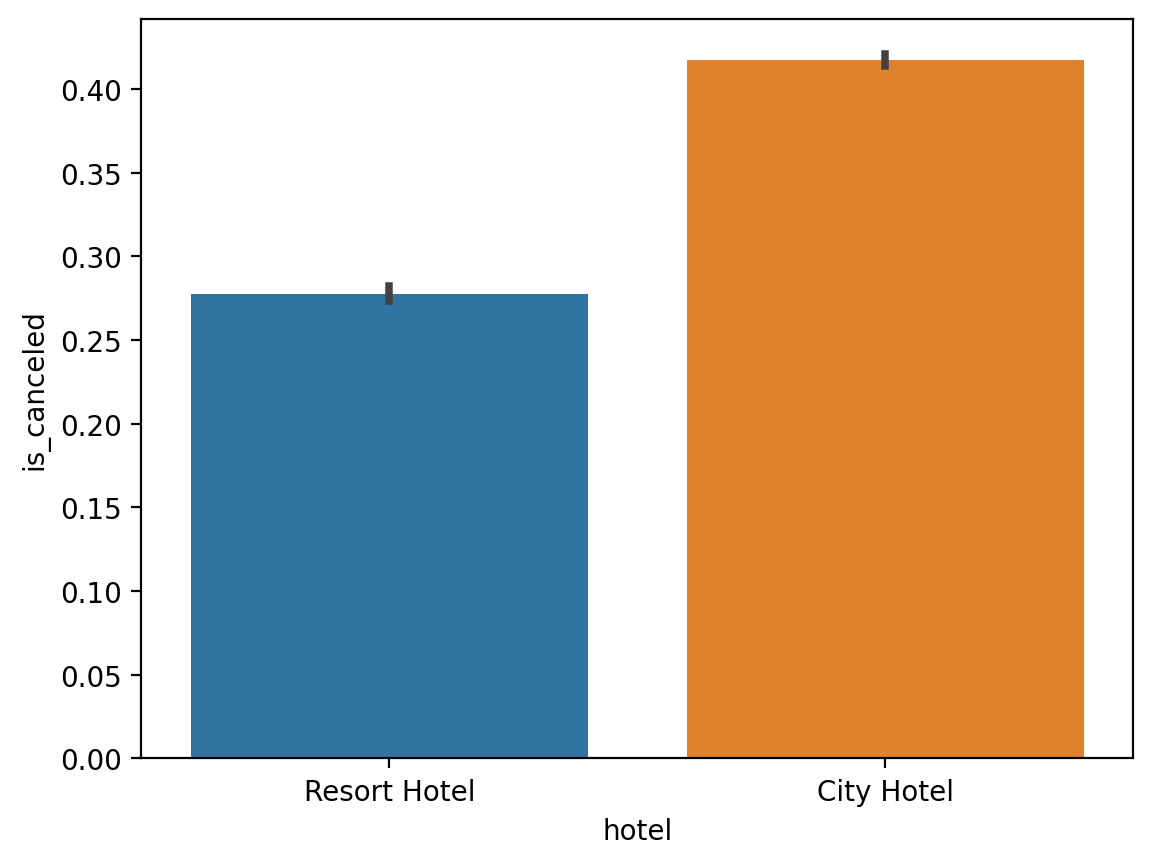

In [21]:
ax=sns.barplot(x="hotel",y="is_canceled",data=df,estimator='mean')

# 
clearly the rate of cancellation is less in resort hotel as compared to the city hotel

In [22]:
df['lead_time_rank']=pd.qcut(df['lead_time'].rank(method='first').values,10,duplicates='drop')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,lead_time_rank
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-01-07,"(107451.1, 119390.0]"
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-01-07,"(107451.1, 119390.0]"
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-02-07,"(11939.9, 23878.8]"
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-02-07,"(23878.8, 35817.7]"
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-03-07,"(23878.8, 35817.7]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-06-09,"(23878.8, 35817.7]"
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-07-09,"(71634.4, 83573.3]"
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-07-09,"(35817.7, 47756.6]"
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-07-09,"(71634.4, 83573.3]"


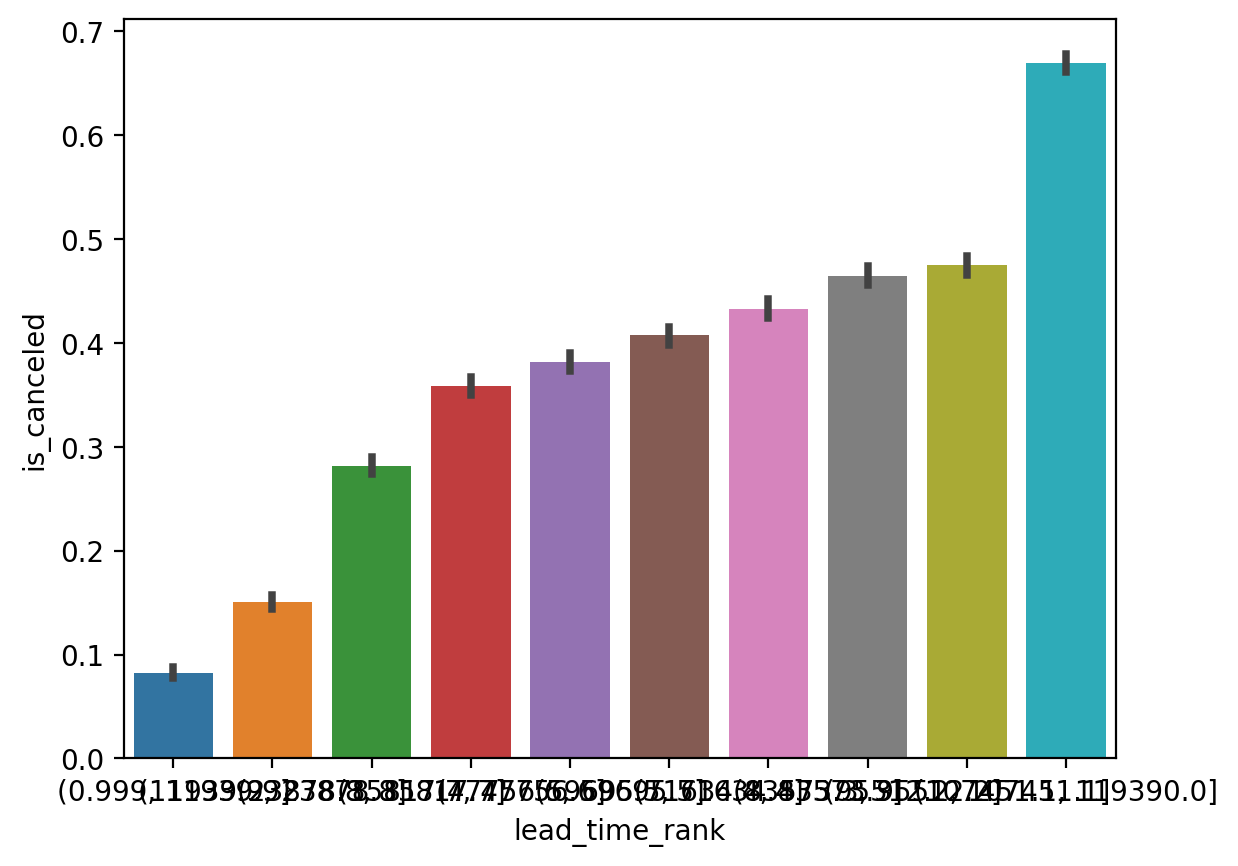

In [23]:
# comparing it with the lead time rank
ax=sns.barplot(x='lead_time_rank',y="is_canceled",estimator='mean',data=df)

#  as it can be seen clearly that  the rate of cancellation increases with the increase in lead time

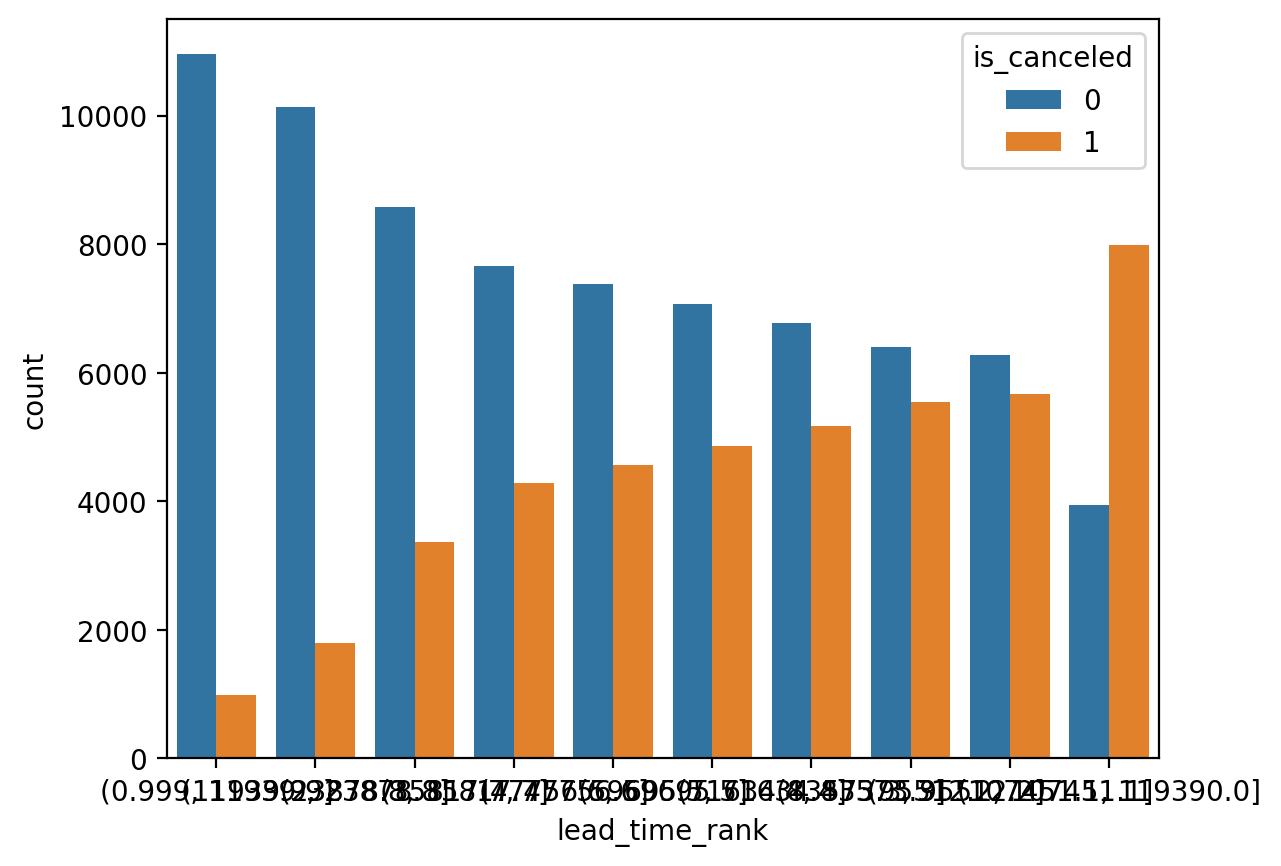

In [24]:
ax=sns.countplot(x="lead_time_rank",hue='is_canceled',data=df)

#
from this graph we can see when the lead time is less the cancellation rate was less and when the lead time increases the 

#
cancellation rate also increases

In [25]:
df=df.drop('lead_time_rank',axis=1)

<AxesSubplot: xlabel='reserved_room_type', ylabel='is_canceled'>

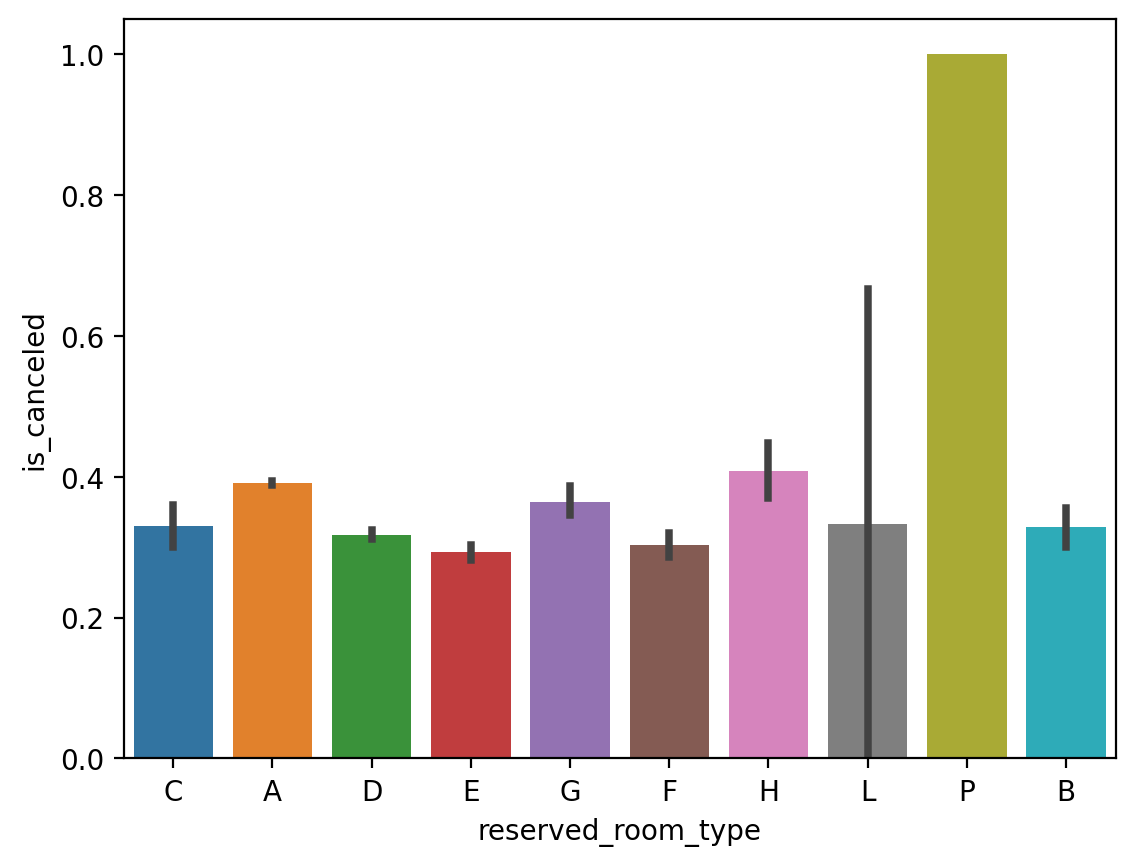

In [26]:
sns.barplot(x='reserved_room_type',y='is_canceled',estimator='mean',data=df)

# 
here it seen that for reserved room type p has the cancellation rate of 100% but let's first count the no. because from one 
 data we cant predict anything

In [27]:
df['reserved_room_type'].value_counts()

A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64

#
so here we can see that the count of p is very less as compared to a d e f g so it just provide ambiguity in data.
 otherwise there is no such discrimination in data

<AxesSubplot: xlabel='market_segment', ylabel='is_canceled'>

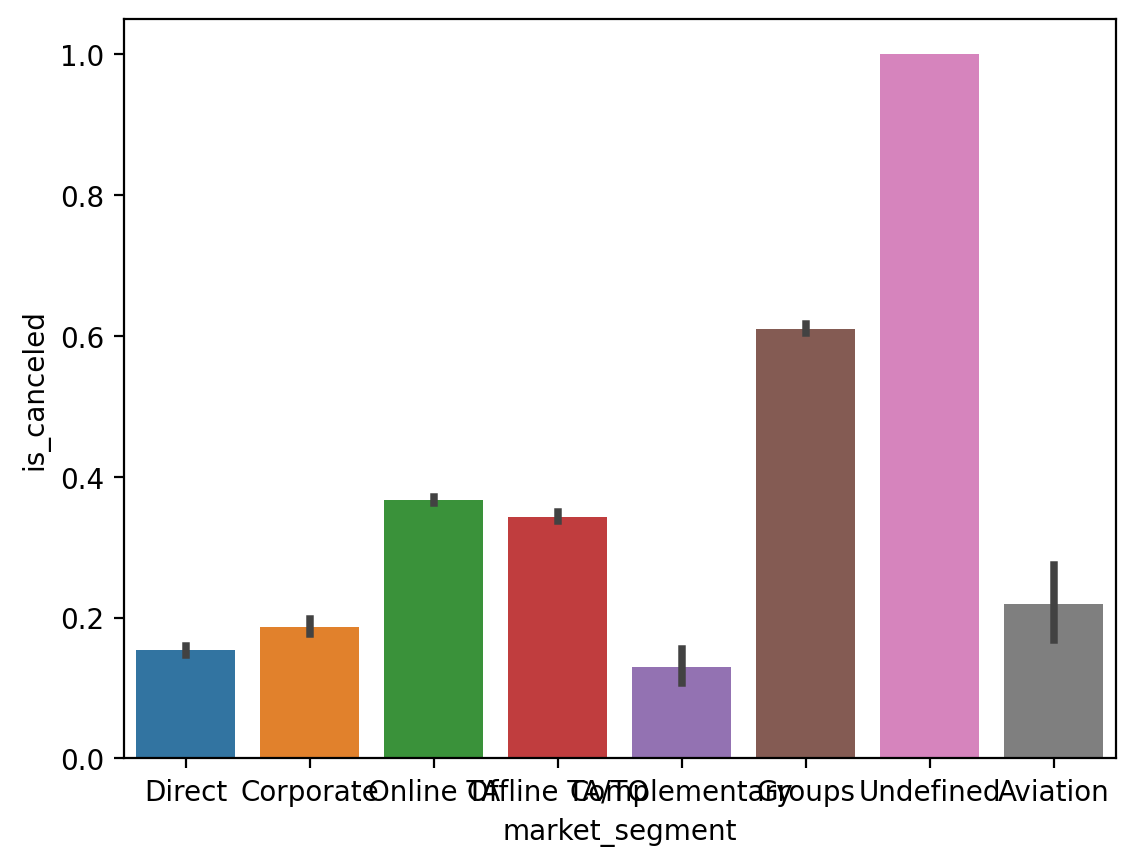

In [28]:
sns.barplot(x='market_segment',y='is_canceled',data=df,estimator='mean')

In [29]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

<AxesSubplot: xlabel='reservation_status', ylabel='is_canceled'>

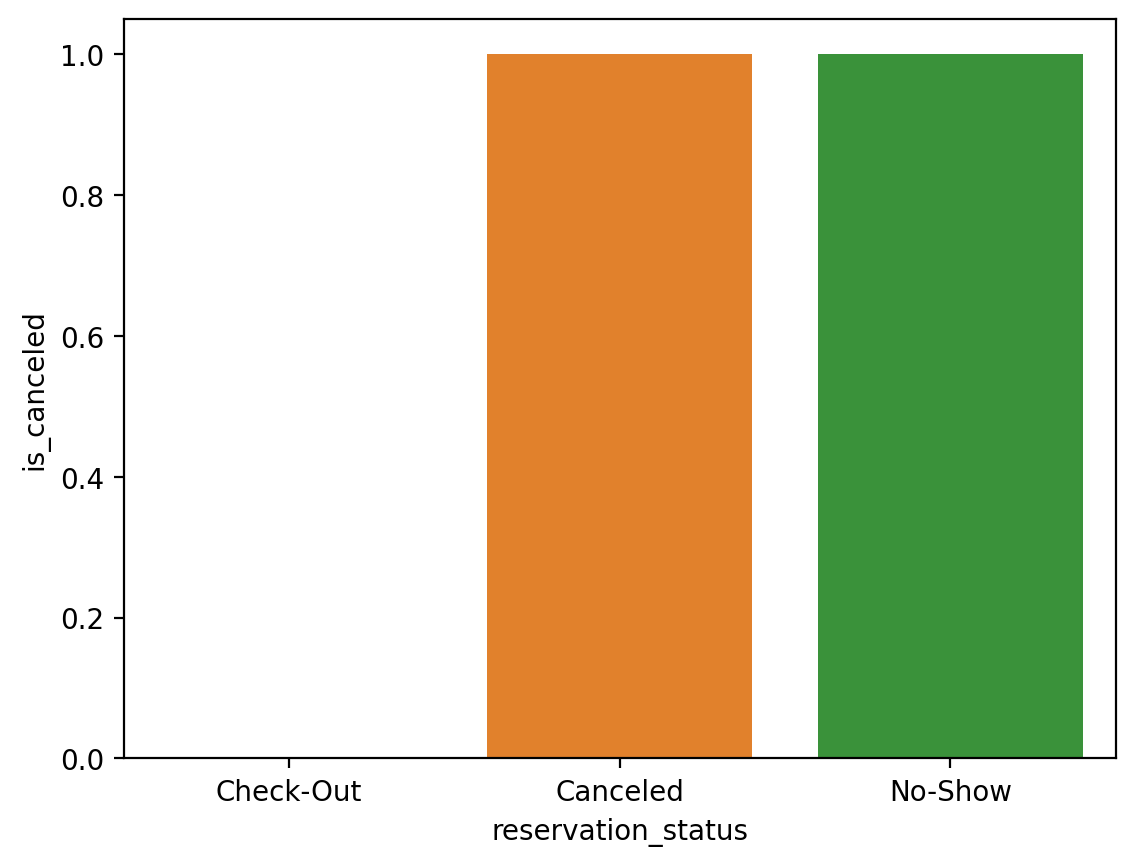

In [30]:
sns.barplot(x='reservation_status',y='is_canceled',data=df,estimator='mean')

In [31]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

<AxesSubplot: xlabel='arrival_date_year', ylabel='is_canceled'>

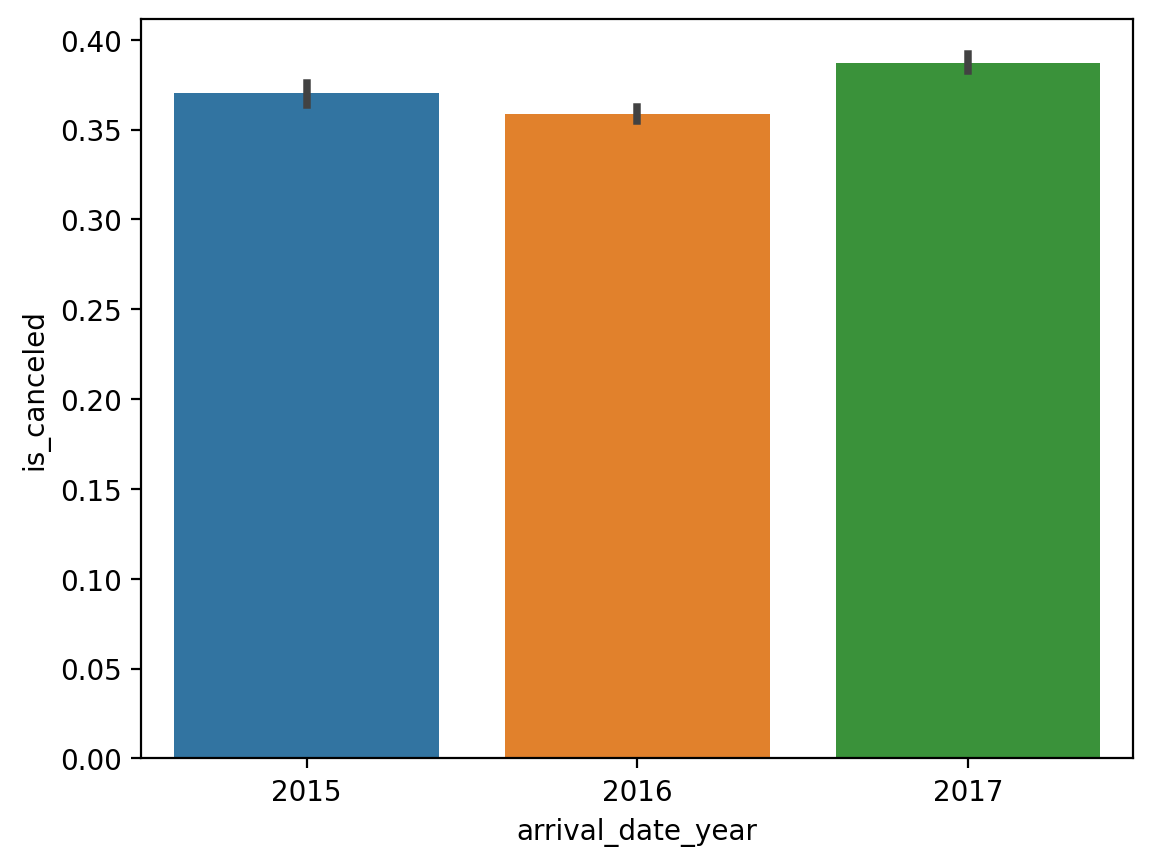

In [32]:
sns.barplot(x='arrival_date_year',y="is_canceled",data=df,estimator='mean')

##
here no appreciable changes appear so this is also of not use

<AxesSubplot: xlabel='arrival_date_week_number', ylabel='is_canceled'>

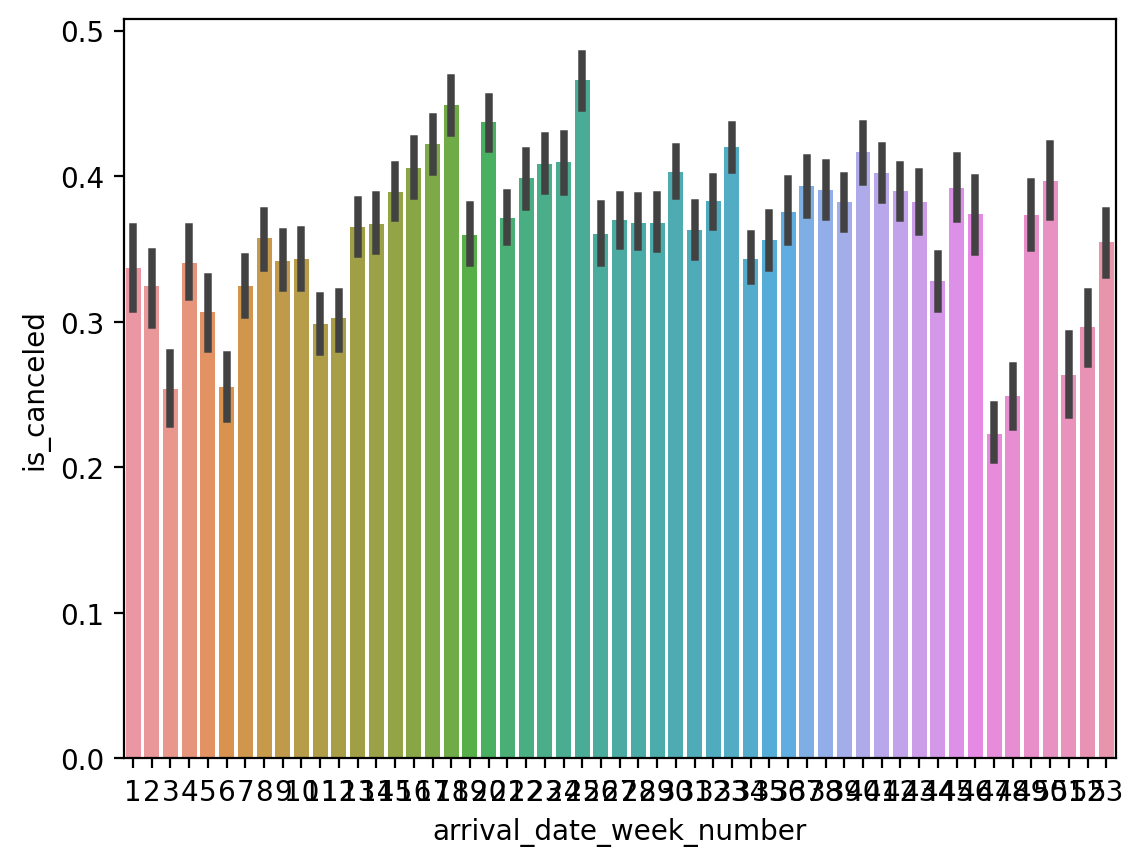

In [33]:
sns.barplot(x='arrival_date_week_number',y='is_canceled',data=df)

# 
so here we see that the cancellation rate is less in some weeks and it is higher in some other weeks  

<AxesSubplot: xlabel='stays_in_weekend_nights', ylabel='is_canceled'>

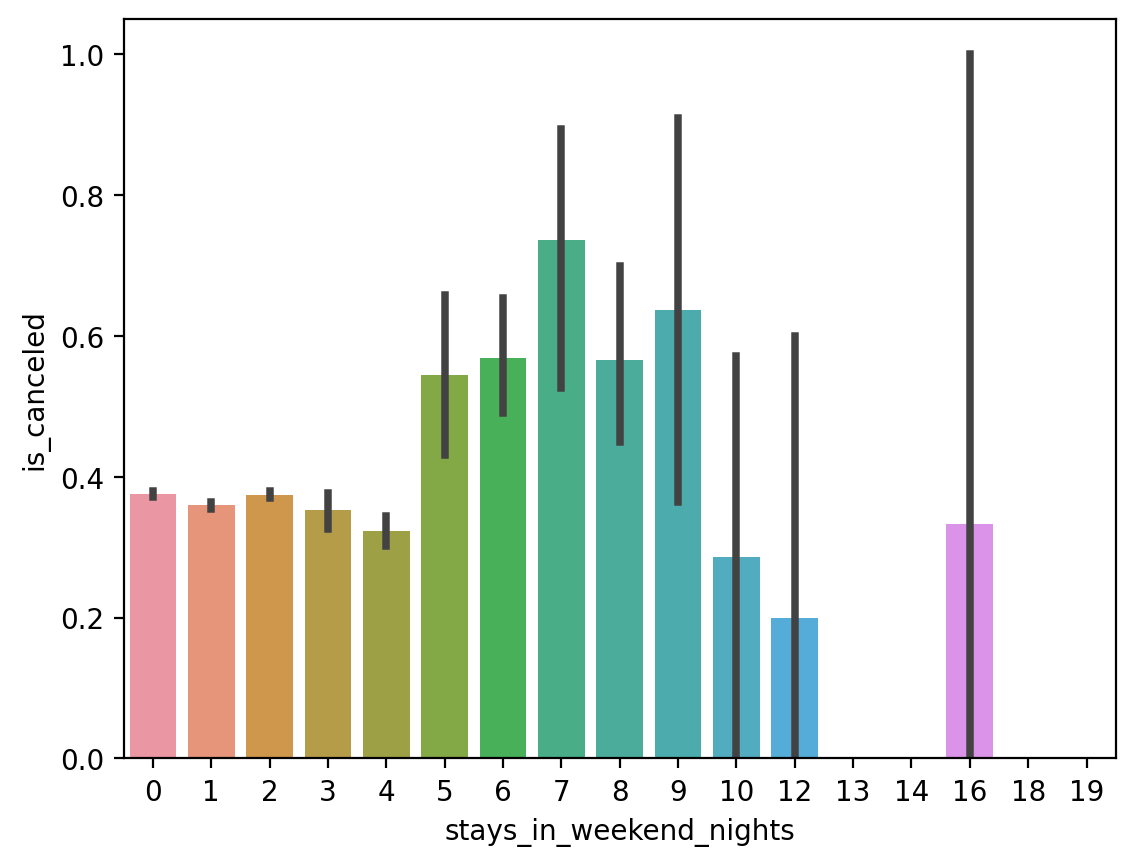

In [34]:
sns.barplot(x='stays_in_weekend_nights',y='is_canceled',data=df)

In [35]:
df['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

#clearly we can see the the values of 0,2,1 are much more than of 7,8,9 so these are not as useful and will create redundancy in data

<AxesSubplot: xlabel='arrival_date_day_of_month', ylabel='is_canceled'>

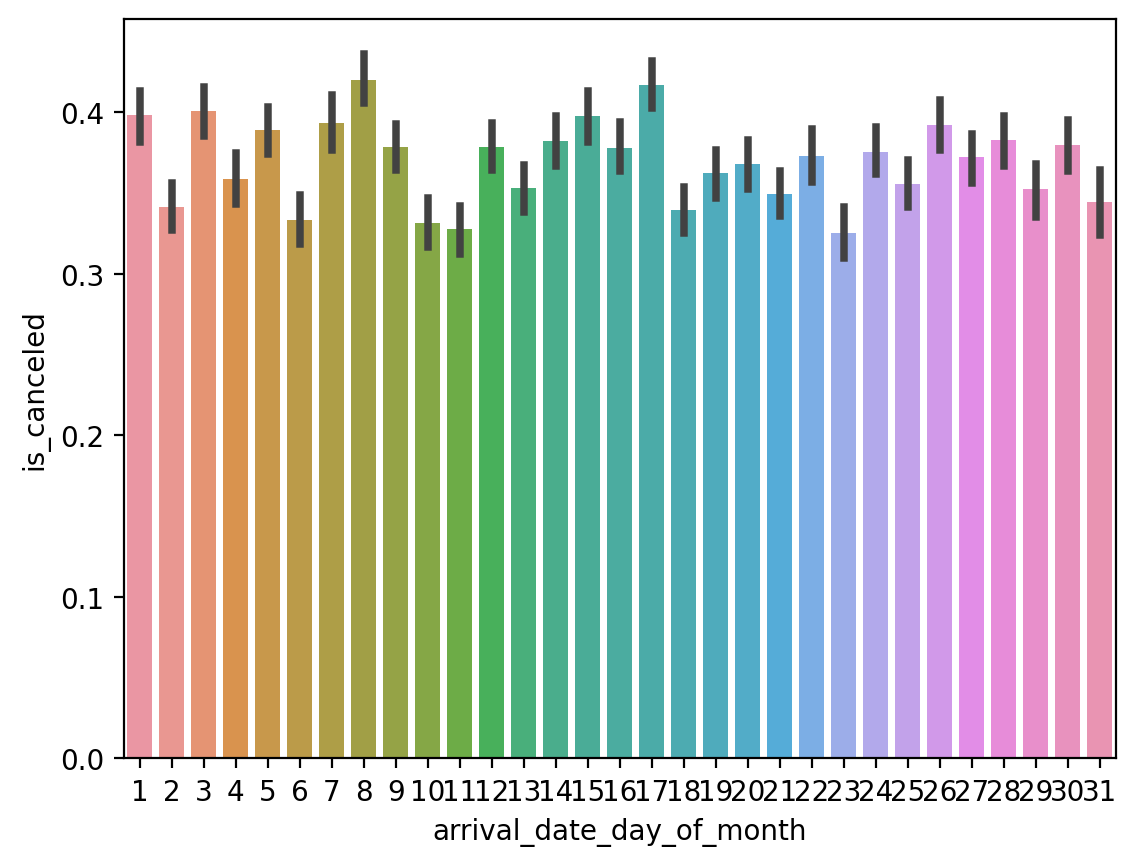

In [36]:
sns.barplot(x='arrival_date_day_of_month',y='is_canceled',estimator='mean',data=df)

##
here also no appreciable chnges are present 

<AxesSubplot: xlabel='previous_cancellations', ylabel='is_canceled'>

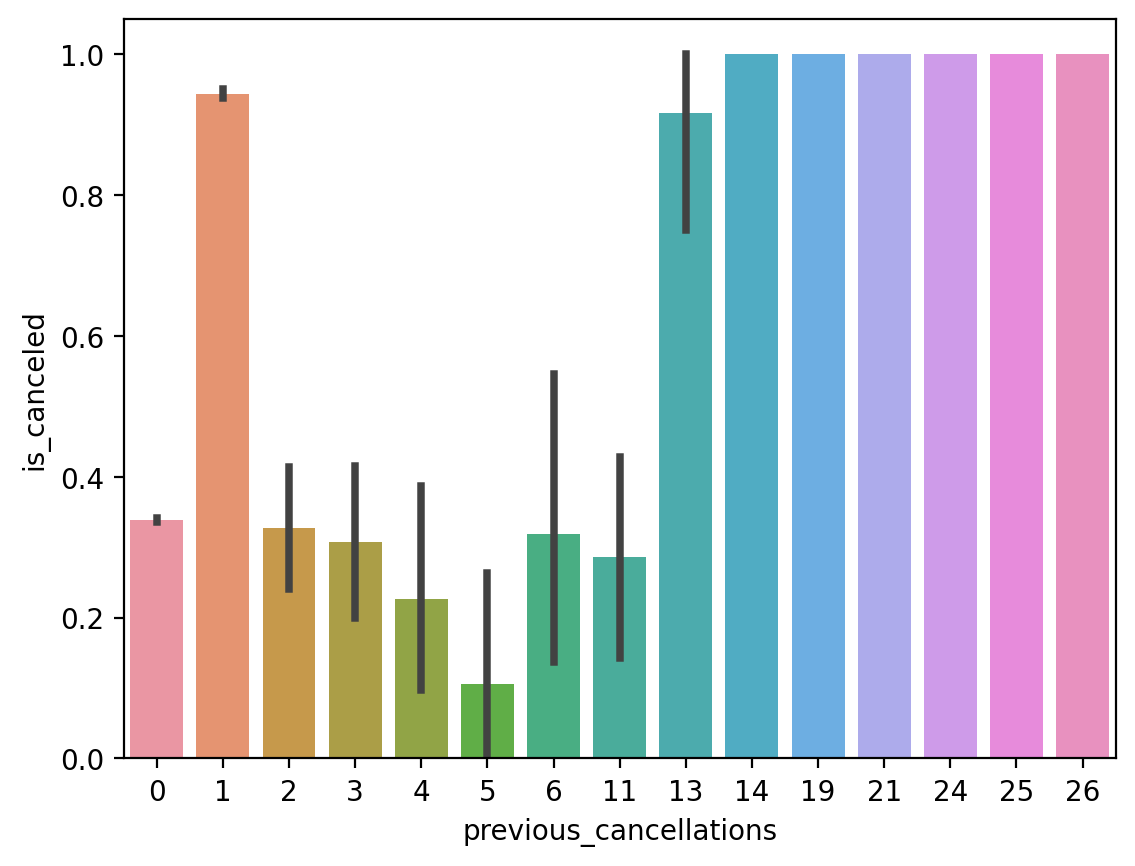

In [37]:
sns.barplot(x='previous_cancellations',y='is_canceled',estimator='mean',data=df)

In [38]:
df['previous_cancellations'].value_counts()

0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
19        19
5         19
14        14
13        12
21         1
Name: previous_cancellations, dtype: int64

#
the number of value_counts of 0 and 1 is much greater than other like some of them are showing cancellation rate of 100% but
#
it is not true they are just causing ambiguity in data as their value_counts are very less than 0 and 1

In [39]:
df['reservation_status'].value_counts()

Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64

In [40]:
#  so let's check for null in datasets because they can cause to our machine learning model
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [41]:
nan_replacement_dict = {"children": 0 ,"country" : "UKNWN", 'agent' : 0.0, 'company' : 0}
df.fillna(nan_replacement_dict, inplace = True)

In [42]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [43]:
unwanted_room = np.where(df['reserved_room_type'] == df['assigned_room_type'], 'Wanted', 'Unwanted')

In [44]:
df['unwanted_room'] = unwanted_room

In [45]:
df.drop('unwanted_room', axis = 1, inplace = True)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-01-07
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-02-07
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,2015-02-07
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,2015-03-07


In [46]:
df.drop(['reservation_status', 
'reservation_status_date' , 'arrival_date_week_number', 'stays_in_weekend_nights', 'arrival_date_month', 'agent'], axis = 1, inplace = True)
df.shape

(119390, 26)

In [47]:
df
df.shape

(119390, 26)

In [48]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_day_of_month', 'stays_in_week_nights', 'adults',
       'children', 'babies', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'company',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8840\576056115.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


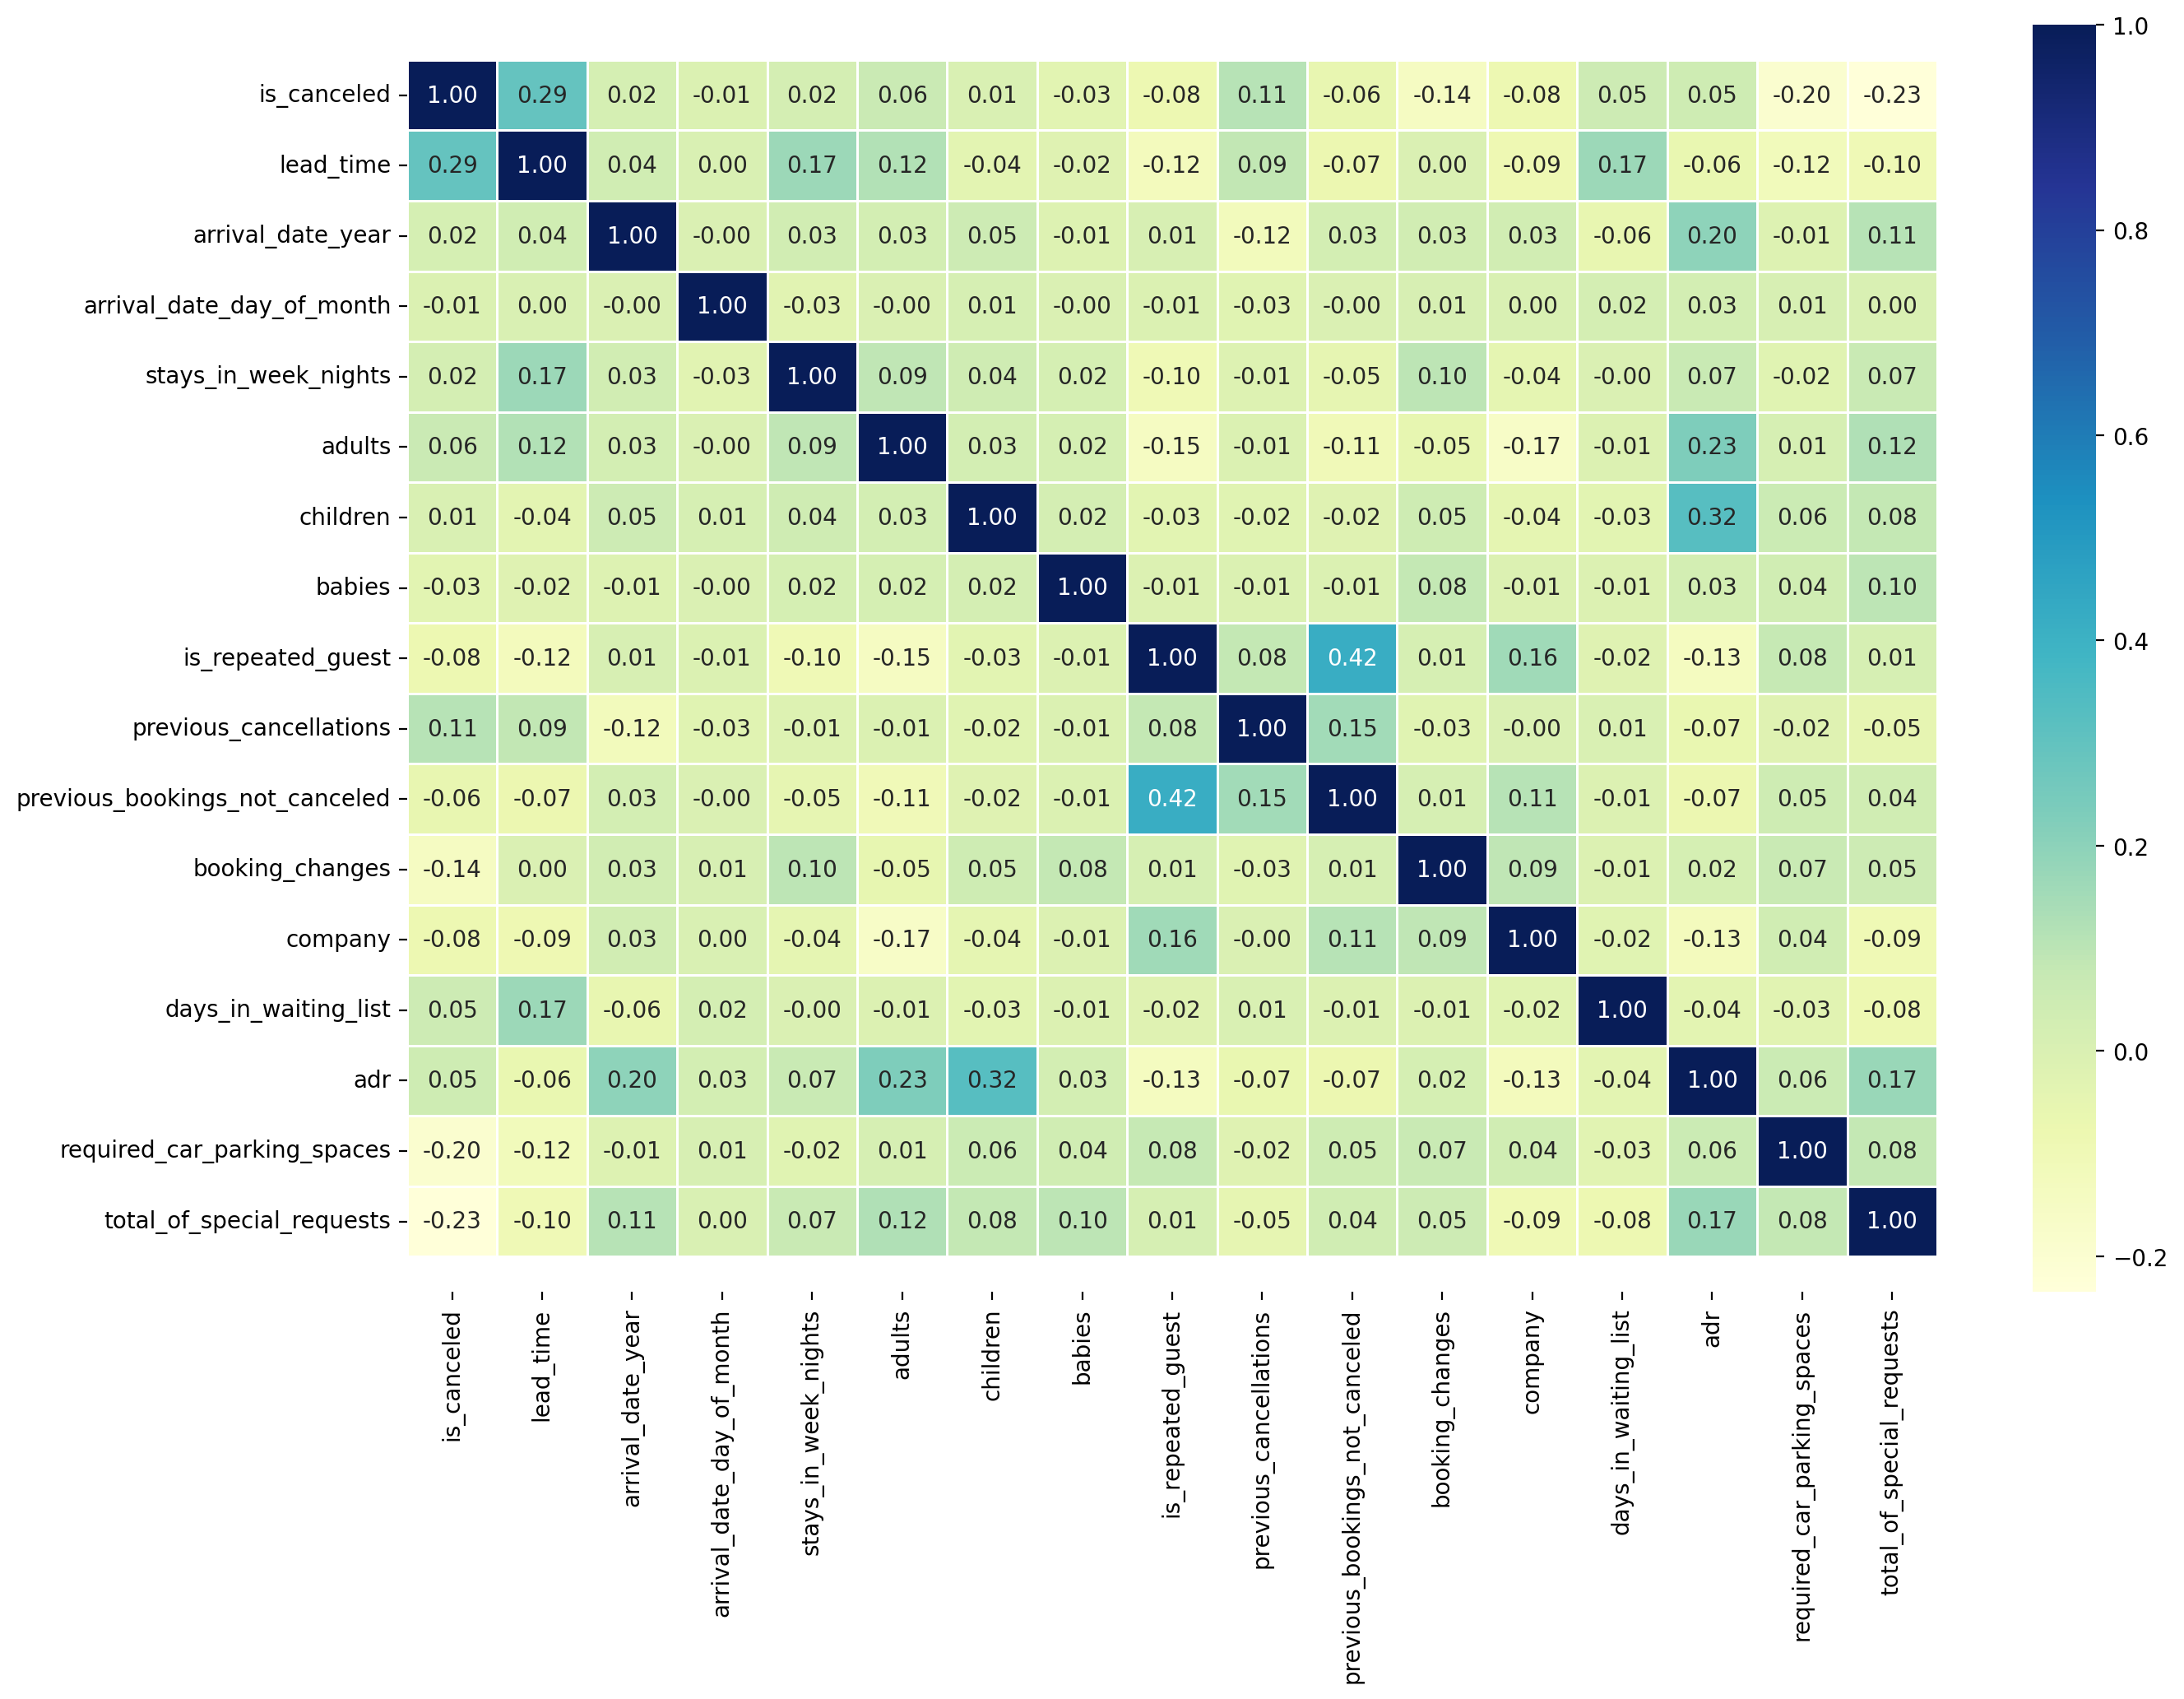

In [49]:
#  lets make a correlation matrix, for the analysis of the trend that how one quantity depends on other
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [50]:
cancel_correlation_array = df.corr()['is_canceled']
cancel_correlation_array.abs().sort_values(ascending = False)[1:]

C:\Users\DELL\AppData\Local\Temp\ipykernel_8840\2841335882.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cancel_correlation_array = df.corr()['is_canceled']


lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_day_of_month         0.006130
children                          0.005036
Name: is_canceled, dtype: float64

In [51]:
#Copying dataframe so that we don't need to dropcolumns from the main dataframe inplace
df1 = df.copy()

In [52]:
#  manually one hot encoding of the hotel columns
hotel={'Resort Hotel':0,'City Hotel':1}

In [53]:
df1['hotel']=df1['hotel'].map(hotel)

In [54]:
#one hot encoding 
df1 = pd.get_dummies(data = df1, columns = ['meal', 'market_segment', 'distribution_channel',
                                            'reserved_room_type', 'assigned_room_type', 'customer_type', 'deposit_type'], drop_first = True)

In [55]:
le= LabelEncoder()

In [56]:
df1['country'] = le.fit_transform(df1['country'])

In [57]:
x=df1.drop(['is_canceled'],axis=1)
y=df1['is_canceled']
np.random.seed(42)
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [58]:
models={"Logistic regression":LogisticRegression(n_jobs = -1),
       " random forest classifier": RandomForestClassifier(n_jobs = -1),
       "KNN":KNeighborsClassifier()}

In [59]:
def fit_and_score(algorithm, X_train, X_test, y_train, y_test):
    alg = algorithm
    alg_model = alg.fit(X_train, y_train)
    global y_pred
    y_pred = alg_model.predict(X_test)
    
    print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred)))

In [60]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.8896408469579201

In [61]:
for name, model in models.items():
    print("\n")
    print(name, "\n")
    fit_and_score(model, x_train, x_test, y_train, y_test )



Logistic regression 

Accuracy Score: 0.7907397480568212

Confusion Matrix:
 [[16705  2015]
 [ 4231  6897]]


 random forest classifier 

Accuracy Score: 0.8899423746984723

Confusion Matrix:
 [[17548  1172]
 [ 2113  9015]]


KNN 

Accuracy Score: 0.7896341463414634

Confusion Matrix:
 [[16108  2612]
 [ 3667  7461]]


# 
now we got our baseline model and we know that our first model is not always the best model, let's look at the following and then again analyse our model
* hyperparameter tunning
* feature importance
* confusion matrix
* cross-validation
* precision
* recall
* F1 score
* classification report
* ROC Curve
* AUC

#  hyperparameter tunning (by hand)

In [62]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(x_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(x_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(x_test, y_test))

In [63]:
train_scores

[0.995264791941212,
 0.8983270420584754,
 0.8853052198968082,
 0.8580777735587769,
 0.8522146032029662,
 0.8411583391034375,
 0.8367246655200912,
 0.8284827231913515,
 0.8260034397266087,
 0.8206651627169373,
 0.8181300395345201,
 0.8146233052645686,
 0.8118648232114538,
 0.8097094101092225,
 0.807844363538898,
 0.8063031873310849,
 0.8040025909629,
 0.8020817046749011,
 0.8003060016528556,
 0.7974246722208572]

In [64]:
test_scores

[0.7890310908603592,
 0.8032028946663093,
 0.7876909675690164,
 0.7983449477351916,
 0.7896341463414634,
 0.796602787456446,
 0.7899021709997319,
 0.7942240686143125,
 0.7887630662020906,
 0.7925154114178504,
 0.7892321093540605,
 0.7898686679174484,
 0.7863843473599571,
 0.7875569552398821,
 0.7860493165371214,
 0.7863843473599571,
 0.7840056285178236,
 0.7861163227016885,
 0.7835030822835701,
 0.7839721254355401]

Maximum KNN score on the test data: 80.32%


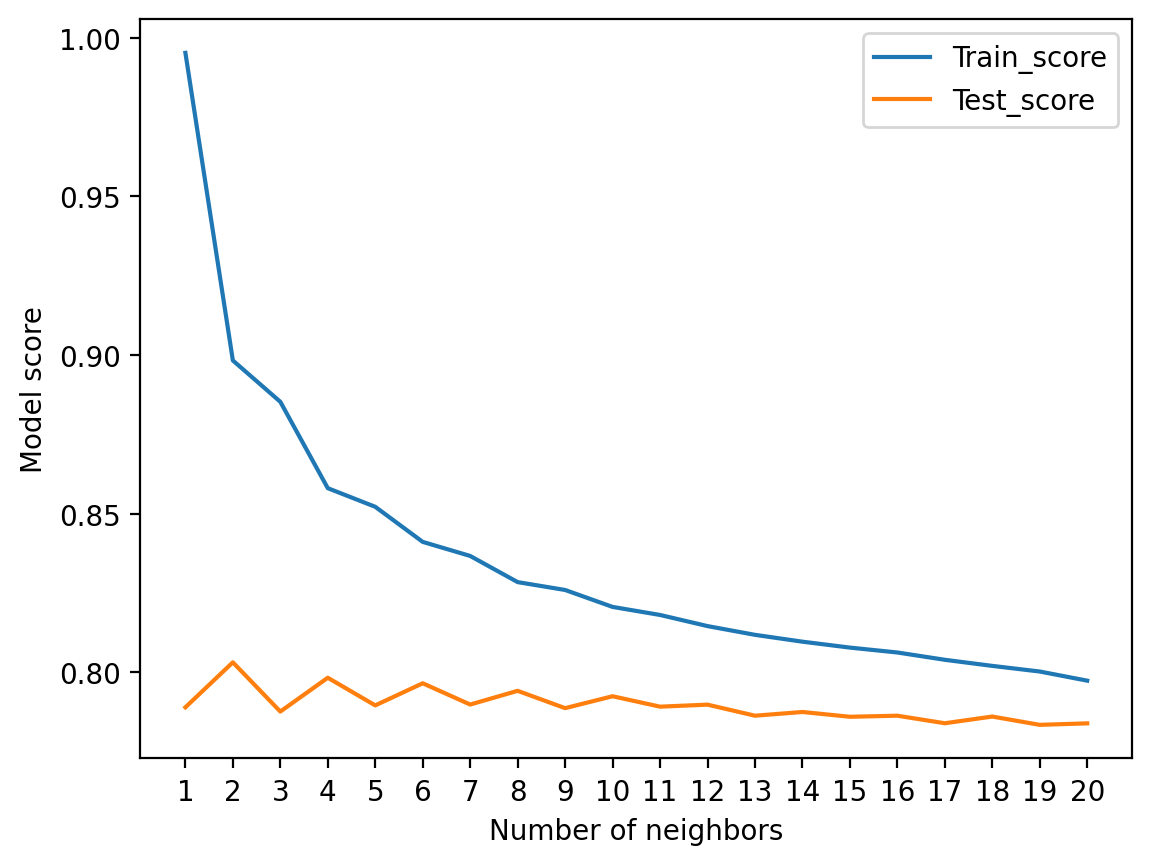

In [65]:
plt.plot(neighbors,train_scores,label="Train_score")
plt.plot(neighbors,test_scores,label="Test_score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

# hyperparameter tunning for the randomforestclassifier

In [66]:
# create hyperparameter grid for logistic regression
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver": ["liblinear"]}
#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [67]:
np.random.seed(42)
# set up random hyperparameter search for RandomFOrestClassifier
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=rf_grid,
                        n_iter=20,
                        cv=5,
                        verbose=True)
# Fit random hyperparameter search model for RandomFOrestClassifier()
rs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [68]:
rs_rf.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [69]:
rs_rf.score(x_test,y_test)

0.881466094880729

In [70]:
#  tuning logistic regressor
np.random.seed(42)
#  setup random hyperparameter search for logistic regression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [71]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 4.281332398719396}

In [72]:
rs_log_reg.score(x_test,y_test)

0.8052465826856071

#  let's tune it using grid search cv

In [73]:
#  different hyperparameter for our logistic regression model
log_reg_grid={"C":np.logspace(-4,4,30),
                "solver": ["liblinear"]}
# setup grid hyperparameter search for logistic regression
gs_log_reg=GridSearchCV(LogisticRegression(),
                       param_grid=log_reg_grid,
                       cv=5,
                       verbose=True)
#  fit grid hyperparameter search model
gs_log_reg.fit(x_train,y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [74]:
gs_log_reg.best_params_

{'C': 1487.3521072935118, 'solver': 'liblinear'}

In [75]:
gs_log_reg.score(x_test,y_test)

0.805481104261592

In [76]:
#Create a hyperparameter grid for RandomForestClassifier
rf_grid={"n_estimators":[50,100,150,200],
         "max_depth":[None,5,10],
         "min_samples_split": np.arange(2,20,4),
         "min_samples_leaf":np.arange(1,20,4)}

In [77]:
gs_rf=GridSearchCV(RandomForestClassifier(),
                   param_grid=rf_grid,
                  cv=5,
                  verbose=True)

In [78]:
gs_rf.fit(x_train,y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': array([ 1,  5,  9, 13, 17]),
                         'min_samples_split': array([ 2,  6, 10, 14, 18]),
                         'n_estimators': [50, 100, 150, 200]},
             verbose=True)

In [79]:
gs_rf.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [80]:
gs_rf.score(x_test,y_test)

0.8890377914768158

# 
it is clear that our model was performing better before tuning so we will use that model for further evaluation

#  Evaluating our tuned machine learning classifier, beyon accuracy
* ROC curve and AUC curve
* COnfusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [81]:
y_preds=clf.predict(x_test)

In [82]:
y_preds

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [83]:
y_test

30946     0
40207     1
103708    0
85144     0
109991    0
         ..
49171     1
98949     0
86777     0
64606     1
14194     0
Name: is_canceled, Length: 29848, dtype: int64

C:\Users\DELL\Desktop\ML-projects\prediction-of-room-cancellation-in-hotels\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


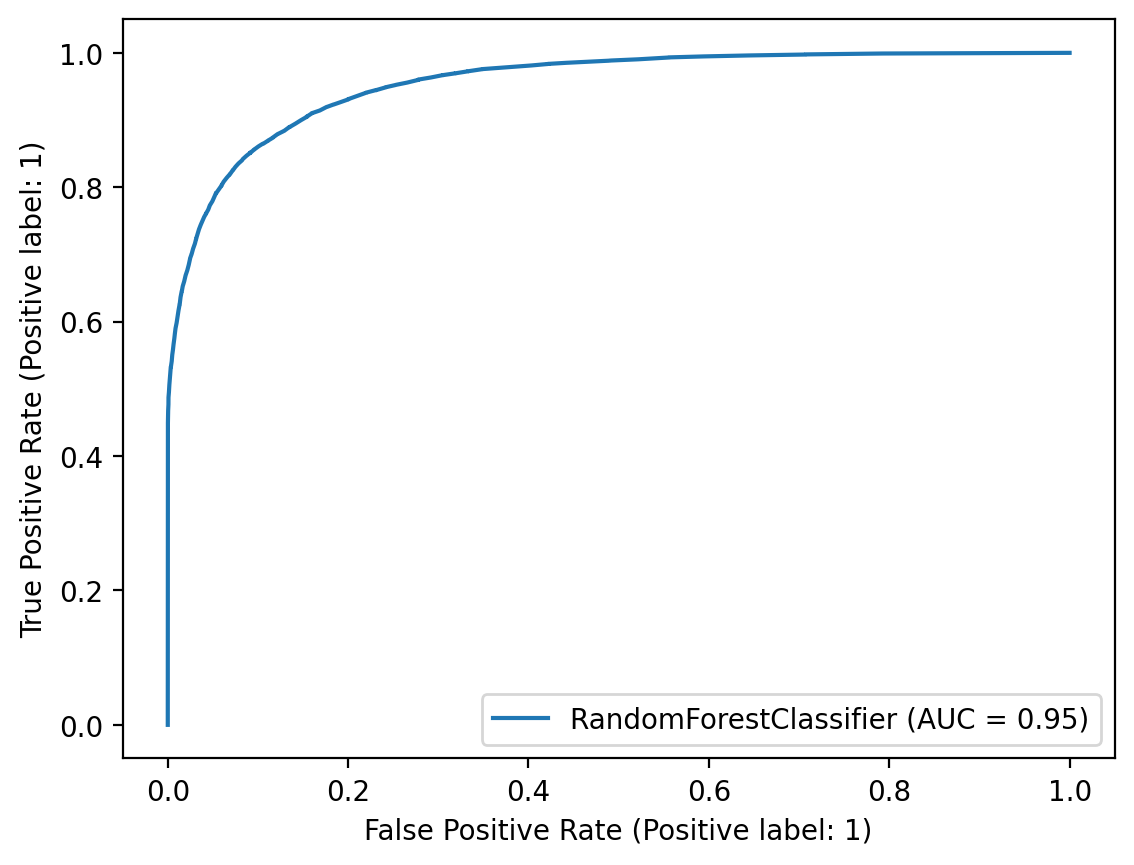

In [84]:
#  plot ROC curve and calculate AUC matrix
plot_roc_curve(clf,x_test,y_test)

In [85]:
print(confusion_matrix(y_test,y_preds))

[[17560  1160]
 [ 2134  8994]]


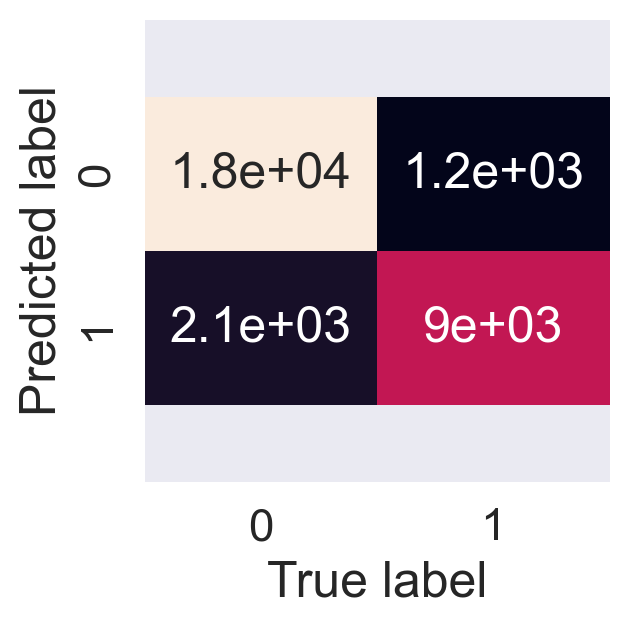

In [86]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
plot_conf_mat(y_test, y_preds)


In [87]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     18720
           1       0.89      0.81      0.85     11128

    accuracy                           0.89     29848
   macro avg       0.89      0.87      0.88     29848
weighted avg       0.89      0.89      0.89     29848



In [88]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.67769495, 0.65838847, 0.71760616, 0.61902169, 0.54066505])

In [89]:
clf.score(x_test,y_test)

0.8896408469579201

In [90]:
lrm=LogisticRegression(C=1487.3521072935118, 
                       solver="liblinear")

In [91]:
# Cross-validated accuracy
cv_acc = cross_val_score(lrm,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.69482369, 0.71743865, 0.79759611, 0.78126309, 0.7935338 ])

In [92]:
clf1=RandomForestClassifier(max_depth= None,
 min_samples_leaf= 1,
 min_samples_split= 2,
 n_estimators= 200)

In [93]:
cv_acc = cross_val_score(clf1,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc

array([0.67233437, 0.66127816, 0.71710361, 0.61022699, 0.54820337])

In [94]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.5703135264904026

In [95]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.5494669823706382

In [96]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.5108611848113539

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
#Decision Tree
tree = DecisionTreeClassifier(max_depth=1).fit(x_train, y_train)
scores = cross_val_score(tree, x_train, y_train, cv=5)
tree_pred = tree.predict(x_test)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(tree.score(x_test, y_test)))
print("F1 score: {:.3f}".format(f1_score(y_test, tree_pred)))
print(confusion_matrix(y_test, tree_pred))

Average cross validation score: 0.750
Test accuracy: 0.750
F1 score: 0.497
[[18697    23]
 [ 7439  3689]]


In [99]:
clf.score(x_test,y_test)

0.8896408469579201

#  Feature importance 

In [100]:
#  Fit an instance of RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_day_of_month,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,1,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.0,0,Transient,0.0,0,0
1,Resort Hotel,0,737,2015,1,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0.0,0,Transient,0.0,0,0
2,Resort Hotel,0,7,2015,1,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0.0,0,Transient,75.0,0,0
3,Resort Hotel,0,13,2015,1,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0.0,0,Transient,75.0,0,0
4,Resort Hotel,0,14,2015,1,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0.0,0,Transient,98.0,0,1


In [102]:
pd.crosstab(df["lead_time"],df["is_canceled"])

is_canceled,0,1
lead_time,,
0,5915,430
1,3139,321
2,1856,213
3,1634,182
4,1539,176
...,...,...
622,0,17
626,0,30
629,0,17


#  Conclusion

# 
in conclusion we find that the model is able to predict that whether a booking will cancel or not.Our focus was to minimise the 
incorrectly predicted cancelation as this worst outcome for the hotel bookings.The model is based on the RandomForestClassifier.